deg=1 | MSE=10.72195
deg=2 | MSE=2.31258
deg=3 | MSE=0.00000


array([-3.33333333e-01,  2.00000000e+00,  6.89327706e-16, -9.94759830e-15])

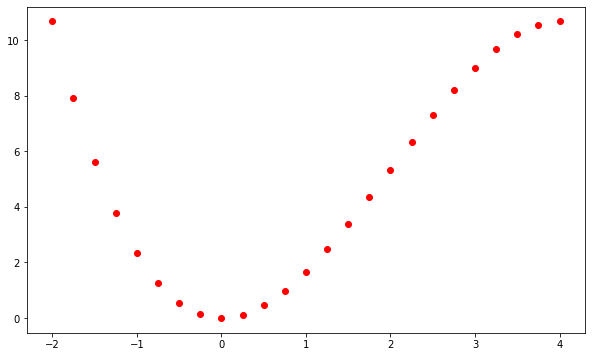

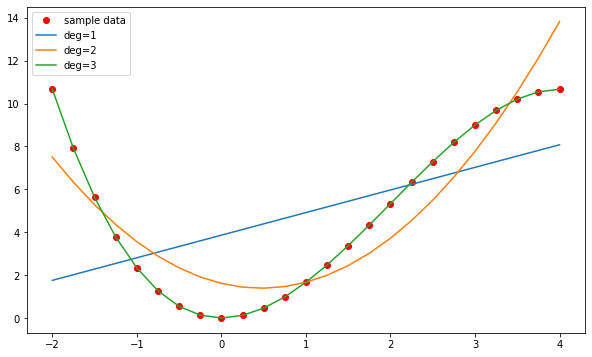

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def test(x):
    return 2 * x ** 2 - x ** 3 / 3


x = np.linspace(-2, 4, 25)
y = test(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro')

import SimpleMathFormulas4AI as smai

smai.beta_linear_regression(x, y), smai.alpha_linear_regression(x, y), smai.MSE(x, y)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 2, 3]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend();

reg

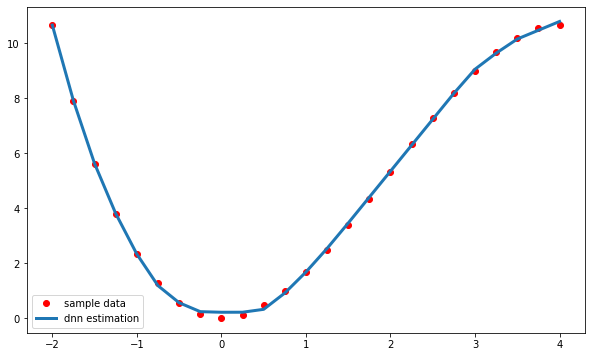

In [2]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=3 * [256], learning_rate_init=0.03, max_iter=5000)
model.fit(x.reshape(-1, 1), y)
MLPRegressor(hidden_layer_sizes=[256, 256, 256], learning_rate_init=0.03, max_iter=5000)
y_ = model.predict(x.reshape(-1, 1))
smai.MSE(x, y_)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='dnn estimation')
plt.legend()

round=1 | MSE=3.87256
round=2 | MSE=0.92527
round=3 | MSE=0.28527
round=4 | MSE=0.13192
round=5 | MSE=0.09568


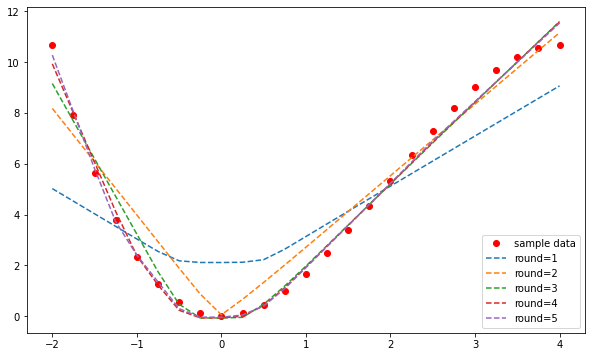

In [3]:
import tensorflow as tf
tf.random.set_seed(100)

from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

smai.MSE(y, y_)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 6):
    model.fit(x, y, epochs=100, verbose=False)
    y_ = model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend();

In [ ]:
np.random.seed(0)
x = np.linspace(-1, 1)
y = np.random.random(len(x)) * 2 - 1

# plt.figure(figsize=(10, 6))
# plt.plot(x, y, 'ro', label='sample data')
# for deg in [1, 5, 9, 11, 13, 15]:
#     reg = np.polyfit(x, y, deg=deg)
#     y_ = np.polyval(reg, x)
#     MSE = ((y - y_) ** 2).mean()
#     print(f'deg={deg:2d} | MSE={MSE:.5f}')
#     plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
# plt.legend()

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
for _ in range(3):
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='rmsprop')
model.summary()
512
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 8):
    model.fit(x, y, epochs=500, verbose=False)
    y_ = model.predict(x)
    MSE = smai.MSE(y, y_.flatten())
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend();

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               512       
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
 dense_5 (Dense)             (None, 256)               512       
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
 dense_7 (Dense)             (None, 256)               512       
                                                                 
 dense_8 (Dense)             (None, 1)                

In [107]:
import pandas as pd

f = 10
n = 250
np.random.seed(100)
x = np.random.randint(0, 2, (n, f))
y = np.random.randint(0, 2, n)

fcols = [f'f{_}' for _ in range(f)]
data = pd.DataFrame(x, columns=fcols)
data['l'] = y
grouped = data.groupby(list(data.columns))
grouped['l'].size().unstack(fill_value=0)
# freq = grouped['l'].size().unstack(fill_value=0)
# freq['sum'] = freq[0] + freq[1]

l                              0  1
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9      
0  0  0  0  0  0  0  1  1  1   0  1
                  1  0  1  0   1  1
                           1   0  1
               1  0  0  0  0   1  0
                           1   0  1
...                           .. ..
1  1  1  1  1  0  0  0  0  0   0  1
                     1  0  0   1  0
                  1  1  0  0   0  1
               1  1  0  0  0   1  0
                     1  0  1   0  2

[227 rows x 2 columns]